Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Epoch 1/30
5/5 [==============================] - 6s 1s/step - loss: 5.6234 - accuracy: 0.4000 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 5s 1s/step - loss: 0.7441 - accuracy: 0.6667 - val_loss: 0.8961 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 7s 2s/step - loss: 0.7622 - accuracy: 0.3333 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 5s 1s/step - loss: 0.7268 - accuracy: 0.6923 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 0.6937 - accuracy: 0.5333 - val_loss: 0.7239 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 6s 1s/step - loss: 0.7207 - accuracy: 0.3333 - val_loss: 0.8118 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 5s 1s/step - loss: 0.7578 - accuracy: 0.4667 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 8/30
5/5 [=========================

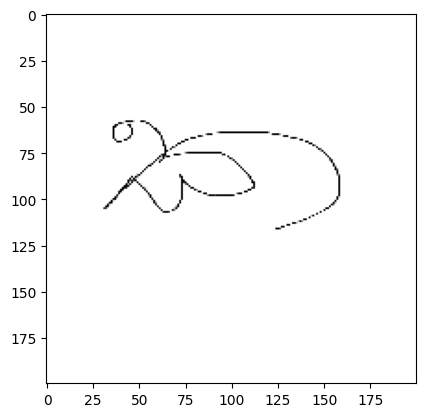

AttributeError: module 'numpy' has no attribute 'exand_dims'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

from google.colab import drive
drive.mount('/content/drive')

os.chdir("/content/drive/My Drive/mini project/")
os.getcwd()

img = image.load_img("Training/a/a.1.jpg")

plt.imshow(img)

cv2.imread("Training/a/a.1.jpg").shape

train = ImageDataGenerator(rescale = 1/255)

validation = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory('Training/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('Validation/',
                                                   target_size = (200,200),
                                                   batch_size = 3,
                                                   class_mode = 'binary')

train_dataset.class_indices

train_dataset.classes

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])



model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)


validation_dataset.class_indices

dir_ath = 'Testing/'

for i in os.listdir(dir_ath):
    # Load the image and resize it to the target size
  img = image.load_img(dir_ath+ i,target_size=(200,200))
  # Display the image using matplotlib
  plt.imshow(img)
  plt.show()

  # Convert the image to a NumPy array and add an extra dimension
  X = image.img_to_array(img)
  X = np.exand_dims(X,axis = 0)
# Stack the array vertically to create a batch of images
  images = np.vstack([X])
# Make a prediction using the trained model
  val = model.predict(images)
# Check the predicted value and print the corresponding class label
  if val == 0:
    print("This is Letter 'a' in Sinhala")
  else:
    print("This is Letter 'ka' in Sinhala")


